In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fruits/fruits-360/LICENSE
/kaggle/input/fruits/fruits-360/readme.md
/kaggle/input/fruits/fruits-360/papers/fruit_recognition_deep_learning.pdf
/kaggle/input/fruits/fruits-360/Training/Quince/r_305_100.jpg
/kaggle/input/fruits/fruits-360/Training/Quince/139_100.jpg
/kaggle/input/fruits/fruits-360/Training/Quince/128_100.jpg
/kaggle/input/fruits/fruits-360/Training/Quince/r_239_100.jpg
/kaggle/input/fruits/fruits-360/Training/Quince/185_100.jpg
/kaggle/input/fruits/fruits-360/Training/Quince/r_199_100.jpg
/kaggle/input/fruits/fruits-360/Training/Quince/r_287_100.jpg
/kaggle/input/fruits/fruits-360/Training/Quince/73_100.jpg
/kaggle/input/fruits/fruits-360/Training/Quince/191_100.jpg
/kaggle/input/fruits/fruits-360/Training/Quince/r_306_100.jpg
/kaggle/input/fruits/fruits-360/Training/Quince/112_100.jpg
/kaggle/input/fruits/fruits-360/Training/Quince/r_250_100.jpg
/kaggle/input/fruits/fruits-360/Training/Quince/64_100.jpg
/kaggle/input/fruits/fruits-360/Training/Quince/r_186

In [2]:
import tensorflow as tf

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from keras.preprocessing.image import ImageDataGenerator


In [4]:
train_path = '../input/fruits/fruits-360/Training'
test_path = '../input/fruits/fruits-360/Test'

In [5]:
import os

In [6]:
data_dir = '../input/fruits/fruits-360'

In [7]:
os.listdir(data_dir)

['papers', 'LICENSE', 'Training', 'readme.md', 'test-multiple_fruits', 'Test']

In [8]:
train_path = '../input/fruits/fruits-360/Training'
test_path = '../input/fruits/fruits-360/Test'

In [9]:
train_class = os.listdir(train_path)
test_class = os.listdir(test_path)

In [10]:
count = 0
for clas in train_class:
    count = count+len(os.listdir(train_path+"/"+clas))
print(train_class)
print(count)
total = len(os.listdir(train_path))
print(total)

['Quince', 'Grapefruit White', 'Granadilla', 'Orange', 'Apple Red 3', 'Grape White 2', 'Corn Husk', 'Tamarillo', 'Banana Red', 'Nectarine Flat', 'Pepper Yellow', 'Nut Forest', 'Pear Monster', 'Fig', 'Tomato Heart', 'Onion Red Peeled', 'Lemon Meyer', 'Onion Red', 'Passion Fruit', 'Cucumber Ripe', 'Cactus fruit', 'Tomato not Ripened', 'Mango Red', 'Apple Pink Lady', 'Pomegranate', 'Plum', 'Pineapple', 'Tomato 1', 'Cherry 2', 'Apple Red 2', 'Avocado ripe', 'Dates', 'Maracuja', 'Papaya', 'Nut Pecan', 'Pear Stone', 'Cherry Wax Yellow', 'Eggplant', 'Apple Golden 2', 'Guava', 'Beetroot', 'Tomato Maroon', 'Potato Red', 'Apple Red Delicious', 'Cherry Wax Red', 'Kiwi', 'Cherry Wax Black', 'Limes', 'Cantaloupe 2', 'Apple Braeburn', 'Pear', 'Carambula', 'Tomato 3', 'Onion White', 'Cherry 1', 'Strawberry', 'Lychee', 'Redcurrant', 'Rambutan', 'Potato Red Washed', 'Tomato 4', 'Hazelnut', 'Tomato Yellow', 'Plum 3', 'Grape White', 'Pineapple Mini', 'Mulberry', 'Grape Blue', 'Pear Abate', 'Melon Piel de

In [11]:
count = 0
for clas in test_class:
    count = count+len(os.listdir(test_path+"/"+clas))
print(test_class)
print(count)
                                 

['Quince', 'Grapefruit White', 'Granadilla', 'Orange', 'Apple Red 3', 'Grape White 2', 'Corn Husk', 'Tamarillo', 'Banana Red', 'Nectarine Flat', 'Pepper Yellow', 'Nut Forest', 'Pear Monster', 'Fig', 'Tomato Heart', 'Onion Red Peeled', 'Lemon Meyer', 'Onion Red', 'Passion Fruit', 'Cucumber Ripe', 'Cactus fruit', 'Tomato not Ripened', 'Mango Red', 'Apple Pink Lady', 'Pomegranate', 'Plum', 'Pineapple', 'Tomato 1', 'Cherry 2', 'Apple Red 2', 'Avocado ripe', 'Dates', 'Maracuja', 'Papaya', 'Nut Pecan', 'Pear Stone', 'Cherry Wax Yellow', 'Eggplant', 'Apple Golden 2', 'Guava', 'Beetroot', 'Tomato Maroon', 'Potato Red', 'Apple Red Delicious', 'Cherry Wax Red', 'Kiwi', 'Cherry Wax Black', 'Limes', 'Cantaloupe 2', 'Apple Braeburn', 'Pear', 'Carambula', 'Tomato 3', 'Onion White', 'Cherry 1', 'Strawberry', 'Lychee', 'Redcurrant', 'Rambutan', 'Potato Red Washed', 'Tomato 4', 'Hazelnut', 'Tomato Yellow', 'Plum 3', 'Grape White', 'Pineapple Mini', 'Mulberry', 'Grape Blue', 'Pear Abate', 'Melon Piel de

In [12]:
plt.imread('../input/fruits/fruits-360/Training/Apple Braeburn/0_100.jpg').shape

(100, 100, 3)

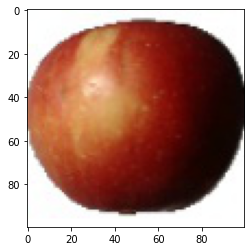

In [13]:
plt.imshow(plt.imread('../input/fruits/fruits-360/Training/Apple Braeburn/0_100.jpg'))

In [14]:
from keras.preprocessing.image import ImageDataGenerator

In [15]:
datagen = ImageDataGenerator(rescale= 1. / 255,
                            rotation_range=20,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            horizontal_flip=True)

In [16]:
train_data = datagen.flow_from_directory(train_path,
                                        target_size=(100, 100)
                                        )
test_data =datagen.flow_from_directory(test_path,target_size=(100,100))

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [17]:
from tensorflow.keras.models import Sequential


In [18]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [19]:
model = Sequential()
from keras import layers

In [20]:
model.add(layers.Conv2D(32,(3,3), input_shape=(100,100,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(131, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 28224)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
model.fit(train_data,epochs=5)

Epoch 1/5
2116/2116 [==============================] - 441s 206ms/step - loss: 2.8977 - accuracy: 0.2742
Epoch 2/5
2116/2116 [==============================] - 239s 113ms/step - loss: 0.7013 - accuracy: 0.7626
Epoch 3/5
2116/2116 [==============================] - 244s 115ms/step - loss: 0.4857 - accuracy: 0.8328
Epoch 4/5
2116/2116 [==============================] - 245s 116ms/step - loss: 0.4121 - accuracy: 0.8578
Epoch 5/5
2116/2116 [==============================] - 248s 117ms/step - loss: 0.3594 - accuracy: 0.8792


In [24]:
df = pd.DataFrame(model.history.history)

<AxesSubplot:>

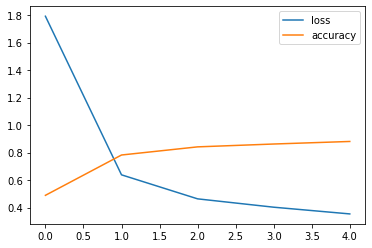

In [25]:
df.plot()

In [26]:
model.weights

[<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 3, 32) dtype=float32, numpy=
 array([[[[-1.40668929e-01, -1.22036368e-01, -5.72405569e-03,
            5.51640727e-02,  1.04817040e-01,  1.66258290e-01,
           -6.24729432e-02, -1.46033898e-01,  1.44432902e-01,
            2.08152801e-01, -4.86148074e-02,  4.74722758e-02,
            1.19282462e-01, -5.80787361e-02, -9.63375792e-02,
            9.41125378e-02, -6.16401620e-02, -3.92755903e-02,
           -7.74782375e-02,  2.17395946e-01, -8.70140642e-02,
           -1.19006723e-01, -1.90075442e-01,  1.52698278e-01,
            1.09300479e-01, -1.11219749e-01, -1.70478910e-01,
            9.09110717e-03,  8.05409402e-02, -2.72459149e-01,
            9.44586322e-02,  3.51232290e-02],
          [ 2.54176669e-02, -1.53060392e-01, -4.00137454e-02,
           -1.48172185e-01, -1.13666859e-02,  5.98536506e-02,
           -7.52523690e-02,  5.33032827e-02, -2.26143263e-02,
            1.02065288e-01, -7.24846572e-02, -8.07501897e-02,
           -